
# Final Project | Data 624 
## by Bishoy Sokkar

    

## 1. Abstract

Fraudulent activities in insurance claims are a significant financial burden on the industry, costing billions annually. This project utilizes publicly available datasets and Python-based machine-learning techniques to identify patterns indicative of fraudulent claims. Through exploratory data analysis (EDA), feature engineering, and anomaly detection models, the project aims to develop insights into claim behavior and identify outliers that could signify fraud. Visualizations and statistical analysis provide a foundation for understanding key predictors of fraud and creating actionable insights for the insurance industry.

## 2. Introduction

Research Question: 
*How can machine learning and AI techniques be used to detect fraudulent activities in insurance claims using publicly available datasets and Python packages?*

Fraudulent claims disrupt the integrity of the insurance system, increasing costs for insurers and policyholders alike. Leveraging data-driven insights and AI techniques offers a scalable and efficient method for fraud detection, potentially transforming the industry’s approach to mitigating financial losses.

## 3. Exploratory Data Analysis (EDA)

Dataset 1 (df1): This dataset contains information about customers' historical claim data, including their claim history, previous claims history, credit scores, and driving records. These attributes provide insights into the behavioral and financial profiles of customers, which are critical for identifying patterns related to fraudulent claims.

Dataset 2 (df2): This dataset includes detailed information about insurance claims, such as age, gender, insurance type, claim amount, diagnosis codes, treatment codes, hospital codes, doctor fees, policy types, and whether the claim was flagged as fraudulent. This dataset is particularly useful for understanding claim-specific characteristics and identifying anomalies or outliers that could indicate fraud.

These two datasets do not have a common attribute, rather they are meant to be analyzed separately to identify a comprehensive foundation for analyzing customer behavior and claim patterns to detect fraudulent activities. 



In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
#read in the datasets from Git Hub 

df1 = pd.read_csv('https://raw.githubusercontent.com/sokkarbishoy/DATA602/refs/heads/main/fraud_detection_data.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/sokkarbishoy/DATA602/refs/heads/main/fraudulent_claim.csv')

In [5]:
df1.head()

,Customer ID,Claim History,Previous Claims History,Credit Score,Driving Record
0,84966,5,3,728,DUI
1,95568,0,2,792,Clean
2,10544,4,1,719,Accident
3,77033,5,0,639,DUI
4,88160,3,3,720,Major Violations


In [6]:
df2.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.582539,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,10000.010000,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.511761,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.981975,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.064162,539,2130,29,288.030168,Basic,0


## Basic Exploration


In [8]:
# Columns of both datasets
df1.columns


Index(['Customer ID', 'Claim History', 'Previous Claims History',
       'Credit Score', 'Driving Record'],
      dtype='object')

In [9]:
df2.columns

Index(['Age', 'Gender', 'Insurance_Type', 'Claim_Amount', 'Diagnosis_Code',
       'Treatment_Code', 'Hospital_Code', 'Doctor_Fee', 'Policy_Type',
       'Fraudulent_Claim'],
      dtype='object')

In [10]:
# no missing data for any variable.

for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Customer ID - 0%
Claim History - 0%
Previous Claims History - 0%
Credit Score - 0%
Driving Record - 0%


In [11]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Gender - 0%
Insurance_Type - 0%
Claim_Amount - 0%
Diagnosis_Code - 0%
Treatment_Code - 0%
Hospital_Code - 0%
Doctor_Fee - 0%
Policy_Type - 0%
Fraudulent_Claim - 0%


In [12]:
df1.dtypes

Customer ID                 int64
Claim History               int64
Previous Claims History     int64
Credit Score                int64
Driving Record             object
dtype: object

In [13]:
df2.dtypes

Age                   int64
Gender               object
Insurance_Type       object
Claim_Amount        float64
Diagnosis_Code        int64
Treatment_Code        int64
Hospital_Code         int64
Doctor_Fee          float64
Policy_Type          object
Fraudulent_Claim      int64
dtype: object

## Data Cleaning 

In [15]:
#display to the nearest accurate value of the columns to round each value to two decimal places. 
df2['Claim_Amount'] = df2['Claim_Amount'].round(2)
df2['Doctor_Fee'] = df2['Doctor_Fee'].round(2)
df2.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.58,131,5733,77,646.46,Basic,0
1,65,Female,Auto,10000.01,505,5725,22,976.75,Basic,0
2,71,Female,Home,14838.51,907,8067,54,216.53,Premium,0
3,18,Male,Health,10922.98,256,9255,28,451.17,Basic,0
4,21,Male,Health,15372.06,539,2130,29,288.03,Basic,0


In [16]:
# Load the df1 Summary Statistics 
print("Summary Statistics for df1:")
df1.describe()

Summary Statistics for df1:


,Customer ID,Claim History,Previous Claims History,Credit Score
count,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,2.522382,1.669495,673.318562
std,28165.000067,1.749397,1.097238,99.226674
min,1.000000,0.000000,0.000000,500.000000
25%,28950.500000,1.000000,1.000000,586.000000
50%,55858.000000,3.000000,2.000000,668.000000
75%,76096.000000,4.000000,3.000000,753.000000
max,100000.000000,5.000000,3.000000,850.000000


In [17]:
# Load the df2 Summary Statistics 
print("Summary Statistics for df2:")
df2.describe()

Summary Statistics for df2:


,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Fraudulent_Claim
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.474300,15552.516041,549.010500,5514.909000,50.065900,502.942236,0.050000
std,17.894948,4320.615505,260.200451,2581.418015,28.737772,195.883379,0.217956
min,18.000000,10000.010000,100.000000,1000.000000,1.000000,100.000000,0.000000
25%,33.000000,11802.367500,322.000000,3303.750000,25.000000,364.925000,0.000000
50%,49.000000,15134.045000,549.000000,5529.000000,50.000000,500.420000,0.000000
75%,64.000000,18469.747500,776.000000,7760.000000,75.000000,636.867500,0.000000
max,79.000000,35363.900000,999.000000,9998.000000,99.000000,1270.400000,1.000000


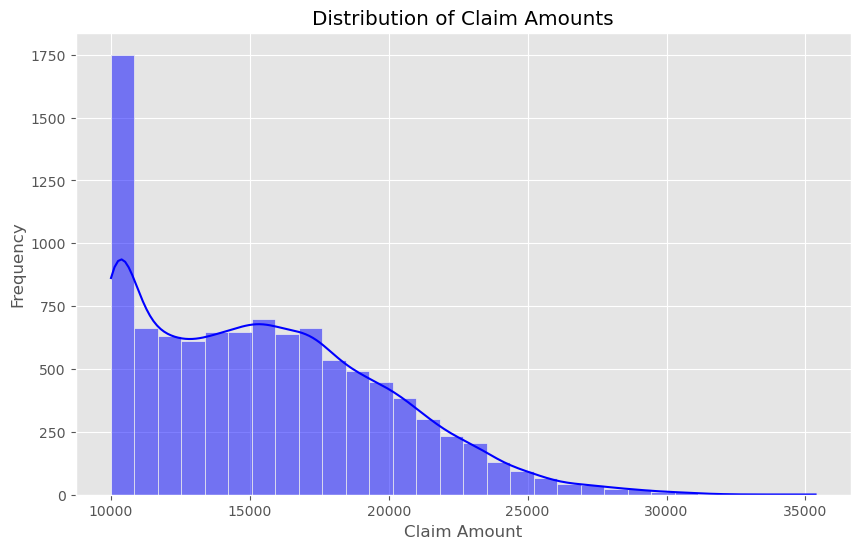

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Claim_Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

### The histogram of claim amounts shows a right-skewed distribution. Most claims fall within a lower range, with a gradual decline in frequency as claim amounts increase. A few very high-value claims act as outliers. The concentration of lower claim amounts indicates typical claim behavior. The presence of high-value claims suggests potential outliers, which may warrant further investigation for possible fraudulent activities.

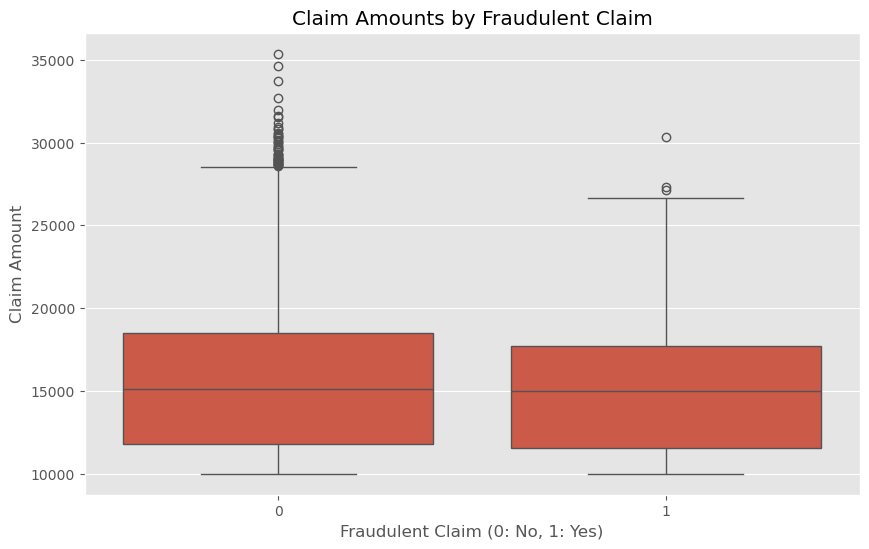

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Fraudulent_Claim', y='Claim_Amount')
plt.title("Claim Amounts by Fraudulent Claim")
plt.xlabel("Fraudulent Claim (0: No, 1: Yes)")
plt.ylabel("Claim Amount")
plt.show()


### The boxplot reveals that fraudulent claims (labeled as 1) exhibit higher variability in claim amounts compared to non-fraudulent claims (0). Several outliers are present in both categories, with fraudulent claims showing a broader range of values. The variability and presence of high outliers in fraudulent claims suggest that such claims are less consistent and more unpredictable, which could be indicative of fraud patterns.

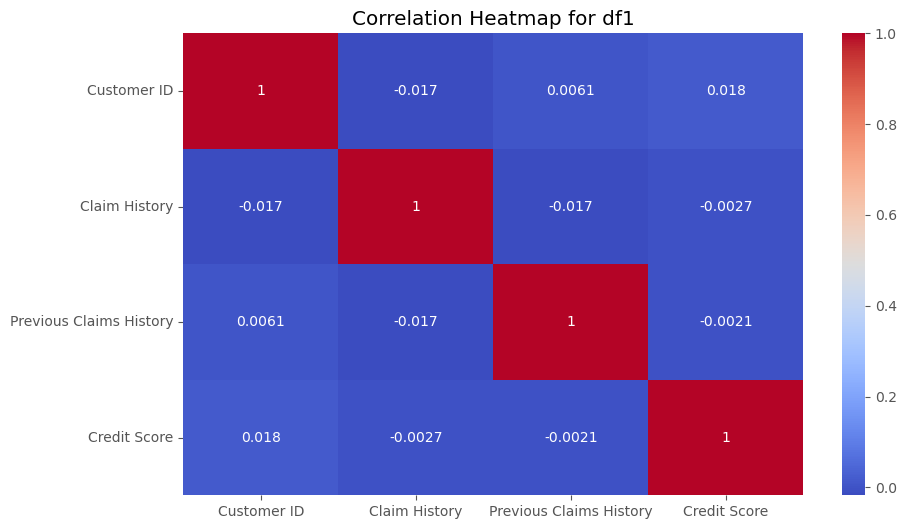

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for df1")
plt.show()

### Correlations between variables provide insights into potential predictors of fraudulent claims. Features like claim history and credit score appear to play a role in identifying anomalies. For example, a moderate correlation is observed between Previous Claims History and Anomaly_Score, suggesting that past claim behavior may influence the likelihood of anomalies.

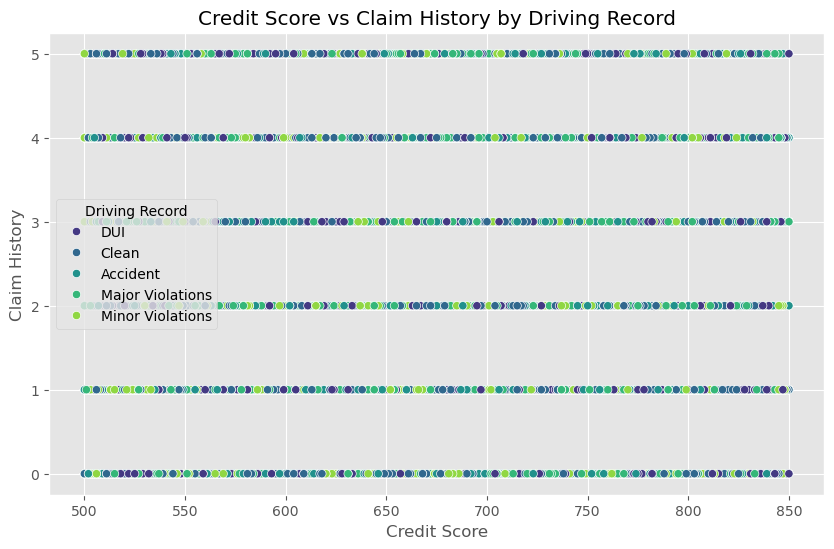

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Credit Score', y='Claim History', hue='Driving Record', palette='viridis', edgecolor='w')
plt.title("Credit Score vs Claim History by Driving Record")
plt.xlabel("Credit Score")
plt.ylabel("Claim History")
plt.show()


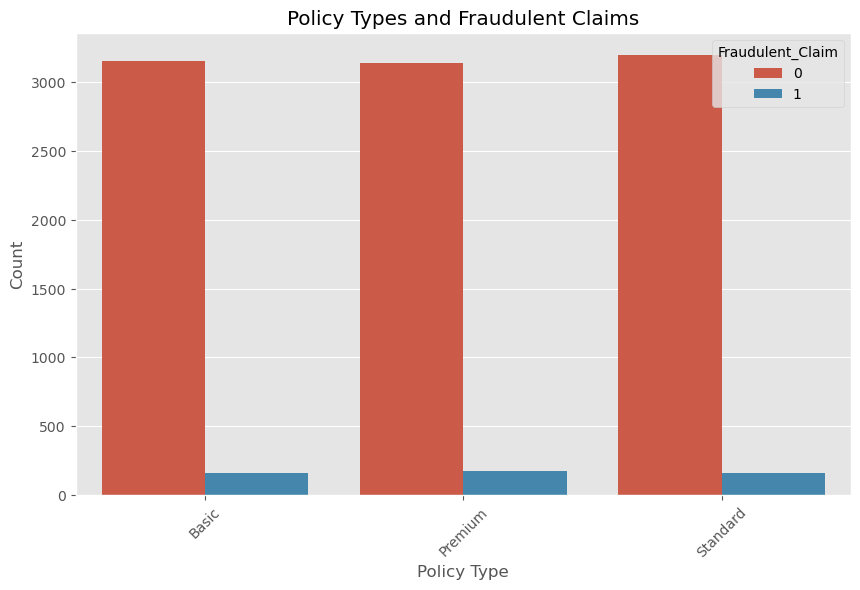

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Policy_Type', hue='Fraudulent_Claim')
plt.title("Policy Types and Fraudulent Claims")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### The countplot indicates that all policy types (Basic, Premium, Standard) have fraudulent claims, but the proportion of fraudulent claims is relatively consistent across these categories. Fraudulent claims are not concentrated within a specific policy type. However, the overall occurrence of fraudulent claims across all policies emphasizes the need for robust fraud detection strategies across policy categories.

#### Integrating AI Models into finding Anomolies

The code below presents a complete implementation of anomaly detection using Isolation Forest Alfotiyhm from the 'sklearn' library.
The model isolates anomalies by creating decision trees. It is particularly effective for datasets where the majority of data points are normal and only a small fraction are anomalous. This approach is useful for identifying outliers in the data that might indicate potential fraudulent activities. The results can be used to guide further investigations into these anomalies. The algorithm calculates the "path length," which is the number of splits required to isolate a data point. Shorter paths indicate anomalies since they differ significantly from the majority of data and are isolated faster. This makes it a powerful tool for insurance fraud detection.

### Normalizing the datasets
Algorithms like Isolation Forest use distance metrics or statistical properties. If features are on vastly different scales, one feature could dominate the analysis, reducing accuracy.

In [29]:
from sklearn.preprocessing import StandardScaler

# Select relevant numeric features for df1
df1_features = ['Claim History', 'Previous Claims History', 'Credit Score']

# Normalize df1
scaler_df1 = StandardScaler()
df1_normalized = pd.DataFrame(scaler_df1.fit_transform(df1[df1_features]), columns=df1_features)

# Include Driving Record for analysis, if needed
df1_normalized['Driving Record'] = df1['Driving Record']

# Select relevant numeric features for df2
df2_features = ['Claim_Amount', 'Doctor_Fee']

# Normalize df2
scaler_df2 = StandardScaler()
df2_normalized = pd.DataFrame(scaler_df2.fit_transform(df2[df2_features]), columns=df2_features)

# Add categorical features for analysis, if needed
df2_normalized['Policy_Type'] = df2['Policy_Type']
df2_normalized['Fraudulent_Claim'] = df2['Fraudulent_Claim']

# Output the first few rows of normalized data for verification
print("Normalized df1:\n", df1_normalized.head())
print("\nNormalized df2:\n", df2_normalized.head())


Normalized df1:
    Claim History  Previous Claims History  Credit Score    Driving Record
0       1.416283                 1.212606      0.551081               DUI
1      -1.441872                 0.301218      1.196075             Clean
2       0.844652                -0.610170      0.460379          Accident
3       1.416283                -1.521558     -0.345863               DUI
4       0.273021                 1.212606      0.470457  Major Violations

Normalized df2:
    Claim_Amount  Doctor_Fee Policy_Type  Fraudulent_Claim
0     -0.077756    0.732706       Basic                 0
1     -1.285183    2.418947       Basic                 0
2     -0.165264   -1.462230     Premium                 0
3     -1.071553   -0.264315       Basic                 0
4     -0.041768   -1.097199       Basic                 0


In [30]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for df1
iso_forest_df1 = IsolationForest(contamination=0.05, random_state=42)
df1['Anomaly_Score'] = iso_forest_df1.fit_predict(df1[['Claim History', 'Previous Claims History', 'Credit Score']])

# Extract anomalies for df1
df1_anomalies = df1[df1['Anomaly_Score'] == -1]
print(f"Number of anomalies in df1: {len(df1_anomalies)}")

# Apply Isolation Forest for df2
iso_forest_df2 = IsolationForest(contamination=0.05, random_state=42)
df2['Anomaly_Score'] = iso_forest_df2.fit_predict(df2[['Claim_Amount', 'Doctor_Fee']])

# Extract anomalies for df2
df2_anomalies = df2[df2['Anomaly_Score'] == -1]
print(f"Number of anomalies in df2: {len(df2_anomalies)}")


Number of anomalies in df1: 2669
Number of anomalies in df2: 499


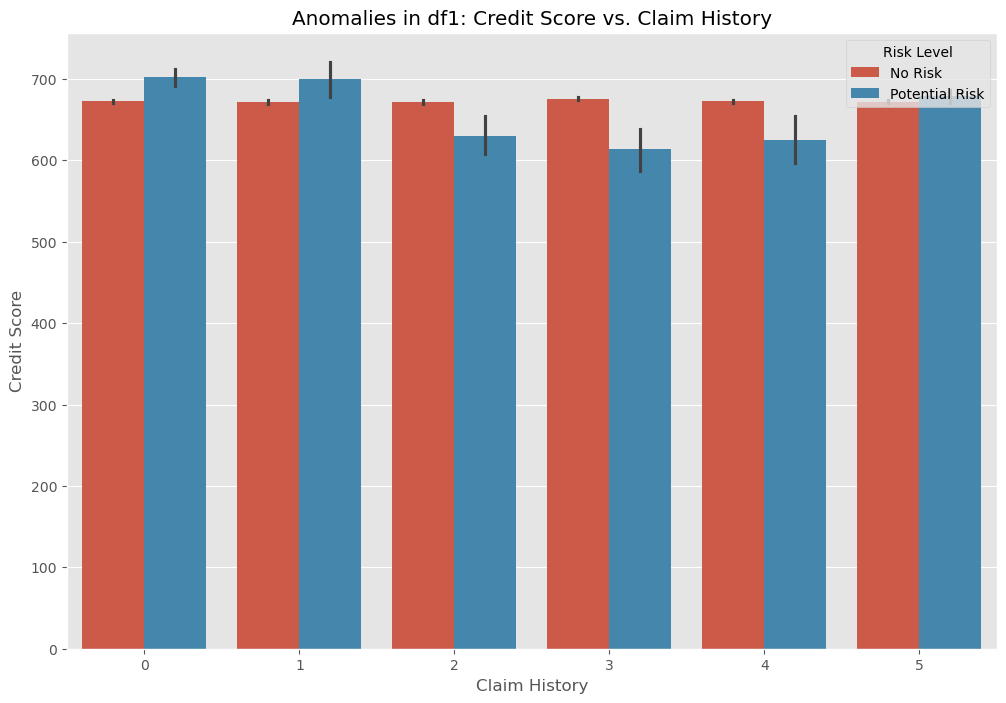

In [31]:

# Modify the scatterplot to a barplot for better readability
import matplotlib.pyplot as plt
import seaborn as sns
# Replace numeric Anomaly_Score with labels for legend clarity
def anomaly_label(score):
    return "Potential Risk" if score == -1 else "No Risk"

df1['Anomaly_Label'] = df1['Anomaly_Score'].apply(anomaly_label)

# Barplot to show anomalies based on Anomaly_Label
plt.figure(figsize=(12, 8))
sns.barplot(data=df1, x='Claim History', y='Credit Score', hue='Anomaly_Label', dodge=True)
plt.title("Anomalies in df1: Credit Score vs. Claim History")
plt.xlabel("Claim History")
plt.ylabel("Credit Score")
plt.legend(title="Risk Level", loc="upper right")
plt.show()

In [32]:
## Testing the model  sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Map Anomaly_Score to 0 and 1 for comparison
df2['Anomaly_Predicted'] = df2['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# Confusion Matrix
conf_matrix = confusion_matrix(df2['Fraudulent_Claim'], df2['Anomaly_Predicted'])
print("Confusion Matrix:")




print(conf_matrix)

# Classification Report
class_report = classification_report(df2['Fraudulent_Claim'], df2['Anomaly_Predicted'])
print("\nClassification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(df2['Fraudulent_Claim'], df2['Anomaly_Predicted'])
print(f"\nModel Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[9022  478]
 [ 479   21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9500
           1       0.04      0.04      0.04       500

    accuracy                           0.90     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.90      0.90      0.90     10000


Model Accuracy: 0.90


- True Negatives (9022): The model correctly identified 9022 non-fraudulent claims as non-anomalous.
- False Positives (478): The model incorrectly identified 478 non-fraudulent claims as anomalies.
- False Negatives (479): The model failed to detect 479 fraudulent claims as anomalies.
- True Positives (21): Only 21 fraudulent claims were correctly identified as anomalies.

# Conclusion.
The model achieved a high overall accuracy of 90%, primarily due to correct classification of the majority class (non-fraudulent claims). Precision and recall for fraudulent claims (class 1) were extremely low (0.04 each), indicating that the model struggles to identify true fraudulent claims effectively. 
This project demonstrates the potential of AI in detecting fraudulent insurance claims through systematic analysis and visualization. The insights gained from EDA highlight critical areas for insurers to focus on, such as high-variability claims, policy designs, and behavior-linked features. Future steps involve deploying machine learning models to validate these findings and automate fraud detection, providing scalable and actionable solutions for the insurance industry.